# Téléchargement de pyspark et importation des modules

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=7ee9f222debdf5db51dd42a476d02247a81cfc05c72248d4036cb62f248afb72
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession, Window
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importation données walmart et dataframe du TD1

In [3]:
# Téléchargement des données à partir du repo git
!wget "https://github.com/ettouilebouael/pyspark_for_datascience/raw/refs/heads/main/data/walmart_data.zip"

# Création d'un dossier pour les données walmart
!mkdir walmart_data

# Décompression du fichier zip contenant les données
!unzip walmart_data.zip -d walmart_data



--2024-10-15 14:38:02--  https://github.com/ettouilebouael/pyspark_for_datascience/raw/refs/heads/main/data/walmart_data.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/ettouilebouael/pyspark_for_datascience/refs/heads/main/data/walmart_data.zip [following]
--2024-10-15 14:38:02--  https://media.githubusercontent.com/media/ettouilebouael/pyspark_for_datascience/refs/heads/main/data/walmart_data.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132754996 (127M) [application/zip]
Saving to: ‘walmart_data.zip’

walmart_data.zip    100%[===================>] 126.60M   143MB/s  

In [4]:
spark = SparkSession.builder.getOrCreate()

In [5]:
#Lecture des parquets
sell_prices_df = spark.read.parquet("/content/walmart_data/sell_prices.parquet")
sell_prices_df.printSchema()
sell_prices_df.show(5)

root
 |-- store_id: string (nullable = true)
 |-- item_id: string (nullable = true)
 |-- wm_yr_wk: long (nullable = true)
 |-- sell_price: double (nullable = true)

+--------+-------------+--------+----------+
|store_id|      item_id|wm_yr_wk|sell_price|
+--------+-------------+--------+----------+
|    CA_1|HOBBIES_1_001|   11325|      9.58|
|    CA_1|HOBBIES_1_001|   11326|      9.58|
|    CA_1|HOBBIES_1_001|   11327|      8.26|
|    CA_1|HOBBIES_1_001|   11328|      8.26|
|    CA_1|HOBBIES_1_001|   11329|      8.26|
+--------+-------------+--------+----------+
only showing top 5 rows



In [6]:
calendar_df = spark.read.parquet("/content/walmart_data/calendar.parquet")
calendar_df.printSchema()
calendar_df.show(5)

root
 |-- date: string (nullable = true)
 |-- wm_yr_wk: long (nullable = true)
 |-- weekday: string (nullable = true)
 |-- wday: long (nullable = true)
 |-- month: long (nullable = true)
 |-- year: long (nullable = true)
 |-- d: string (nullable = true)
 |-- event_name_1: string (nullable = true)
 |-- event_type_1: string (nullable = true)
 |-- event_name_2: string (nullable = true)
 |-- event_type_2: string (nullable = true)
 |-- snap_CA: long (nullable = true)
 |-- snap_TX: long (nullable = true)
 |-- snap_WI: long (nullable = true)

+----------+--------+---------+----+-----+----+---+------------+------------+------------+------------+-------+-------+-------+
|      date|wm_yr_wk|  weekday|wday|month|year|  d|event_name_1|event_type_1|event_name_2|event_type_2|snap_CA|snap_TX|snap_WI|
+----------+--------+---------+----+-----+----+---+------------+------------+------------+------------+-------+-------+-------+
|2011-01-29|   11101| Saturday|   1|    1|2011|d_1|        NULL|        NU

Il faut convertir la date au bon format

Nous re-importons le df walmart_sales puisque la date a été modifié lors du TD1

In [7]:
walmart_sales_df = spark.read.parquet("/content/walmart_data/walmart_sales.parquet")
walmart_sales_df.printSchema()
walmart_sales_df.show(5)

root
 |-- item_id: string (nullable = true)
 |-- dept_id: string (nullable = true)
 |-- cat_id: string (nullable = true)
 |-- store_id: string (nullable = true)
 |-- state_id: string (nullable = true)
 |-- id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- sales: long (nullable = true)

+-------------+---------+-------+--------+--------+--------------------+----------+-----+
|      item_id|  dept_id| cat_id|store_id|state_id|                  id|      date|sales|
+-------------+---------+-------+--------+--------+--------------------+----------+-----+
|HOBBIES_1_001|HOBBIES_1|HOBBIES|    CA_1|      CA|HOBBIES_1_001_CA_...|2011-01-29|    0|
|HOBBIES_1_002|HOBBIES_1|HOBBIES|    CA_1|      CA|HOBBIES_1_002_CA_...|2011-01-29|    0|
|HOBBIES_1_003|HOBBIES_1|HOBBIES|    CA_1|      CA|HOBBIES_1_003_CA_...|2011-01-29|    0|
|HOBBIES_1_004|HOBBIES_1|HOBBIES|    CA_1|      CA|HOBBIES_1_004_CA_...|2011-01-29|    0|
|HOBBIES_1_005|HOBBIES_1|HOBBIES|    CA_1|      CA|HOBBIES_1_00

In [8]:
data_td1_df = spark.read.parquet("/content/drive/MyDrive/monthly_sales_data/")
data_td1_df.printSchema()
data_td1_df.show(5)

root
 |-- item_id: string (nullable = true)
 |-- store_id: string (nullable = true)
 |-- date: date (nullable = true)
 |-- dept_id: string (nullable = true)
 |-- cat_id: string (nullable = true)
 |-- state_id: string (nullable = true)
 |-- id: string (nullable = true)
 |-- sales: long (nullable = true)

+-----------+--------+----------+-------+------+--------+--------------------+-----+
|    item_id|store_id|      date|dept_id|cat_id|state_id|                  id|sales|
+-----------+--------+----------+-------+------+--------+--------------------+-----+
|FOODS_1_001|    CA_1|2011-01-01|FOODS_1| FOODS|      CA|FOODS_1_001_CA_1_...|    3|
|FOODS_1_001|    CA_1|2011-10-01|FOODS_1| FOODS|      CA|FOODS_1_001_CA_1_...|    0|
|FOODS_1_001|    CA_1|2011-11-01|FOODS_1| FOODS|      CA|FOODS_1_001_CA_1_...|   42|
|FOODS_1_001|    CA_1|2012-03-01|FOODS_1| FOODS|      CA|FOODS_1_001_CA_1_...|   38|
|FOODS_1_001|    CA_1|2012-06-01|FOODS_1| FOODS|      CA|FOODS_1_001_CA_1_...|   25|
+-----------+--

Ici, la date est déjà dans le format date, pas besoin de conversion !

In [9]:
#Conversion des variables date du dataframe calendar et walmart
walmart_sales_df = walmart_sales_df.withColumn("date", F.to_date(F.col("date"), "yyyy-MM-dd"))
calendar_df = calendar_df.withColumn("date", F.to_date(F.col("date"), "yyyy-MM-dd"))

# Extraction des caractéristiques temporelles (Mois | Année | Trimestre)

Parsing des dates du dataframe du TD 1

In [10]:
data_td1_df = data_td1_df.withColumn("year", F.year("date"))
data_td1_df = data_td1_df.withColumn("month", F.month("date"))

On ajoute les trimestres

In [11]:
data_td1_df = data_td1_df.withColumn("quarter", F.quarter("date"))

Affichage du dataframe pour vérification

In [ ]:
data_td1_df.show(5)

+-----------+--------+----------+-------+------+--------+--------------------+-----+----+-----+-------+
|    item_id|store_id|      date|dept_id|cat_id|state_id|                  id|sales|year|month|quarter|
+-----------+--------+----------+-------+------+--------+--------------------+-----+----+-----+-------+
|FOODS_1_001|    CA_1|2011-01-01|FOODS_1| FOODS|      CA|FOODS_1_001_CA_1_...|    3|2011|    1|      1|
|FOODS_1_001|    CA_1|2011-10-01|FOODS_1| FOODS|      CA|FOODS_1_001_CA_1_...|    0|2011|   10|      4|
|FOODS_1_001|    CA_1|2011-11-01|FOODS_1| FOODS|      CA|FOODS_1_001_CA_1_...|   42|2011|   11|      4|
|FOODS_1_001|    CA_1|2012-03-01|FOODS_1| FOODS|      CA|FOODS_1_001_CA_1_...|   38|2012|    3|      1|
|FOODS_1_001|    CA_1|2012-06-01|FOODS_1| FOODS|      CA|FOODS_1_001_CA_1_...|   25|2012|    6|      2|
+-----------+--------+----------+-------+------+--------+--------------------+-----+----+-----+-------+
only showing top 5 rows



Les attributs des produits et magasins sont déjà présents, pas besoin de manipuler le df

# Lags des ventes de M-1 à M-12

In [12]:
# create lag of sales
for i in range(1, 13):
    data_td1_df = data_td1_df.withColumn(f"sales_lag_{i}", F.lag(F.col("sales"), i).over(Window.partitionBy("item_id", "store_id").orderBy("date")))

data_td1_df.show(5)


+-----------+--------+----------+-------+------+--------+--------------------+-----+----+-----+-------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+
|    item_id|store_id|      date|dept_id|cat_id|state_id|                  id|sales|year|month|quarter|sales_lag_1|sales_lag_2|sales_lag_3|sales_lag_4|sales_lag_5|sales_lag_6|sales_lag_7|sales_lag_8|sales_lag_9|sales_lag_10|sales_lag_11|sales_lag_12|
+-----------+--------+----------+-------+------+--------+--------------------+-----+----+-----+-------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+
|FOODS_1_001|    CA_1|2011-01-01|FOODS_1| FOODS|      CA|FOODS_1_001_CA_1_...|    3|2011|    1|      1|       NULL|       NULL|       NULL|       NULL|       NULL|       NULL|       NULL|       NULL|       NULL|        NULL|        NULL|        NU

Le lag a bien été effectué après vérification des cinq premières lignes, les valeurs manquantes sont ici puisque nous avons aucune donnée avant 2011

# Afficher le prix moyen mensuel

Nous calculerons le prix moyen au mois en prenant le prix de l'article pour chaque jour du mois et en divisant la somme par le nombre de jour dans le mois

## Associer wm_yr_wk à la date dans sell_prices

In [13]:
# Commence par sélectionner les variables qui nous interessent dans le df
df_core_prix = calendar_df.select("wm_yr_wk", "date")

sell_prices_df = sell_prices_df.join(df_core_prix, on="wm_yr_wk", how="left")
sell_prices_df.show(5)

+--------+--------+-------------+----------+----------+
|wm_yr_wk|store_id|      item_id|sell_price|      date|
+--------+--------+-------------+----------+----------+
|   11325|    CA_1|HOBBIES_1_001|      9.58|2013-07-19|
|   11325|    CA_1|HOBBIES_1_001|      9.58|2013-07-18|
|   11325|    CA_1|HOBBIES_1_001|      9.58|2013-07-17|
|   11325|    CA_1|HOBBIES_1_001|      9.58|2013-07-16|
|   11325|    CA_1|HOBBIES_1_001|      9.58|2013-07-15|
+--------+--------+-------------+----------+----------+
only showing top 5 rows



In [14]:
# Calcule le prix moyen en fonction de chaque produit et magasin
avg_sell_price_df = (
    sell_prices_df
    .withColumn("month", F.month("date"))
    .withColumn("year", F.year("date"))
    .groupBy("item_id", "store_id", "month", "year")
    .agg(F.avg("sell_price").alias("avg_sell_price"))
)

avg_sell_price_df.show(5)

+-------------+--------+-----+----+------------------+
|      item_id|store_id|month|year|    avg_sell_price|
+-------------+--------+-----+----+------------------+
|HOBBIES_1_004|    CA_1|    9|2011|4.3400000000000025|
|HOBBIES_1_009|    CA_1|   11|2011| 1.770000000000001|
|HOBBIES_1_014|    CA_1|    2|2016|1.1599999999999997|
|HOBBIES_1_025|    CA_1|    9|2011| 3.739999999999999|
|HOBBIES_1_028|    CA_1|    3|2012| 7.180000000000005|
+-------------+--------+-----+----+------------------+
only showing top 5 rows



Jointure à gauche entre data_td1_df et avg_sell_price_df sur les variables item_id, store_id, month et year

In [15]:
#left join
data_td1_df = data_td1_df.join(avg_sell_price_df, on=["item_id", "store_id", "month", "year"], how="left")
data_td1_df.show(5)

+-----------+--------+-----+----+----------+-------+------+--------+--------------------+-----+-------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+--------------+
|    item_id|store_id|month|year|      date|dept_id|cat_id|state_id|                  id|sales|quarter|sales_lag_1|sales_lag_2|sales_lag_3|sales_lag_4|sales_lag_5|sales_lag_6|sales_lag_7|sales_lag_8|sales_lag_9|sales_lag_10|sales_lag_11|sales_lag_12|avg_sell_price|
+-----------+--------+-----+----+----------+-------+------+--------+--------------------+-----+-------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+--------------+
|FOODS_1_001|    CA_1|    1|2011|2011-01-01|FOODS_1| FOODS|      CA|FOODS_1_001_CA_1_...|    3|      1|       NULL|       NULL|       NULL|       NULL|       NULL|       NULL|       NULL|       NULL|   

# Création du lead M+1 pour le nombre de ventes

Cela correspond à la création de la variable à prédire y(t+1). On construit donc ici notre ensemble d'apprentissage

In [16]:
data_td2_df = data_td1_df.withColumn(f"sales_lead_1", F.lead(F.col("sales"), 1).over(Window.partitionBy("item_id", "store_id").orderBy("date")))

# Récence du produit

Nous allons récupérer la date de début de commercialisation de chaque produit en prenant la première date pour laquelle le prix associé au produit (et magasin) est présent

In [23]:
data_td2_df.filter((F.col("avg_sell_price").isNotNull()) & (F.col("sales")==0) & (F.col("date") == "2011-01-01")).select("item_id", "store_id", "date", "sales", "avg_sell_price").show(5)

+---------------+--------+----------+-----+--------------+
|        item_id|store_id|      date|sales|avg_sell_price|
+---------------+--------+----------+-----+--------------+
|  HOBBIES_1_356|    CA_1|2011-01-01|    0|          4.98|
|  HOBBIES_1_289|    CA_3|2011-01-01|    0|          4.97|
|  HOBBIES_1_321|    CA_3|2011-01-01|    0|          6.44|
|HOUSEHOLD_1_178|    CA_4|2011-01-01|    0|          4.27|
|HOUSEHOLD_2_441|    CA_4|2011-01-01|    0|          4.94|
+---------------+--------+----------+-----+--------------+
only showing top 5 rows



On peut voir que des produits étaient commercialisés dès le début du dataframe mais n'ont pas été vendus lors du premier mois. Cela s'explique notamment par le fait que le premier mois dans la base de données contient que 3 jours, d'où le choix effectué pour calculer la récence du produit.

In [18]:
first_avg_df = (
    data_td2_df
    .filter(F.col("avg_sell_price").isNotNull()) #retire les NA dans avg_sell_price
    .groupBy("item_id", "store_id") #regroupe par item|store
    .agg(F.min("date").alias("first_date")) #recupere la date min
)

first_avg_df.show(5)

+---------------+--------+----------+
|        item_id|store_id|first_date|
+---------------+--------+----------+
|  HOBBIES_2_104|    CA_1|2013-04-01|
|HOUSEHOLD_1_145|    CA_1|2011-01-01|
|HOUSEHOLD_1_480|    CA_1|2013-08-01|
|HOUSEHOLD_2_295|    CA_1|2011-01-01|
|HOUSEHOLD_2_305|    CA_1|2011-01-01|
+---------------+--------+----------+
only showing top 5 rows



On réalise une jointure à gauche entre data_td2_df et first_avg_df sur les variables item_id et store_id, puis on calcule la difference entre les dates min et le mois correspondant

In [19]:
data_td2_df = data_td2_df.join(first_avg_df, on=["item_id", "store_id"], how="left")
data_td2_df = data_td2_df.withColumn("recency", F.datediff(F.col("date"), F.col("first_date")))
data_td2_df.show(5)

+-----------+--------+-----+----+----------+-------+------+--------+--------------------+-----+-------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+--------------+------------+----------+-------+
|    item_id|store_id|month|year|      date|dept_id|cat_id|state_id|                  id|sales|quarter|sales_lag_1|sales_lag_2|sales_lag_3|sales_lag_4|sales_lag_5|sales_lag_6|sales_lag_7|sales_lag_8|sales_lag_9|sales_lag_10|sales_lag_11|sales_lag_12|avg_sell_price|sales_lead_1|first_date|recency|
+-----------+--------+-----+----+----------+-------+------+--------+--------------------+-----+-------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+--------------+------------+----------+-------+
|FOODS_1_001|    CA_1|    1|2011|2011-01-01|FOODS_1| FOODS|      CA|FOODS_1_001_CA_1_...|    3|      1|   

# Sauvegarde de la base de données en parquet

In [25]:
data_td2_df.write.parquet("/content/drive/MyDrive/data_td2_df")

# Analyse du dataframe sell_prices

In [ ]:
#re importe le dataframe puisque modifié dans le code précédent
sell_prices_df = spark.read.parquet("/content/walmart_data/sell_prices.parquet")
sell_prices_df.printSchema()
sell_prices_df.show(5)

root
 |-- store_id: string (nullable = true)
 |-- item_id: string (nullable = true)
 |-- wm_yr_wk: long (nullable = true)
 |-- sell_price: double (nullable = true)

+--------+-------------+--------+----------+
|store_id|      item_id|wm_yr_wk|sell_price|
+--------+-------------+--------+----------+
|    CA_1|HOBBIES_1_001|   11325|      9.58|
|    CA_1|HOBBIES_1_001|   11326|      9.58|
|    CA_1|HOBBIES_1_001|   11327|      8.26|
|    CA_1|HOBBIES_1_001|   11328|      8.26|
|    CA_1|HOBBIES_1_001|   11329|      8.26|
+--------+-------------+--------+----------+
only showing top 5 rows



La partie ci-dessous se concentrera sur l'analyse du dataframe sell_prices. Nous avons vu auparavant que chaque produit était présent dans la base walmart dès le 29/01/2011. (d'où les 30 490 occurences de la date dans la base, 3 049 produits dans 10 magasins distincts).  

In [ ]:
#count unique item id
sell_prices_df.select("item_id").distinct().count()

3049

In [ ]:
#count unique store_id
sell_prices_df.select("store_id").distinct().count()

10

## Absence de prix pour certaines dates ...

Il est possible de remarquer qu'un article n'a pas de prix pour chaque semaine comprise entre le 29/01/2011 et la fin du dataframe. On s'interesse tout d'abord à la première semaine présente dans le dataframe, i.e wm_yr_wk == 11 101

In [ ]:
sell_prices_df.filter(F.col("wm_yr_wk") == 11101).count()

10932

Que 10932 occurences de la valeur 11101, alors que si tout les produits dans tout les magasins étaient vendus à cette date, on aurait donc 30490. (On a donc que 35,85% de la cohorte totale).

Remarque : 10932 pas divisble par 10 (étant le nombre de magasins différents), on conclut donc que certains articles étaient vendus la semaine du 29/01/2011 mais uniquement dans certains magasins, pas la totalité d'entre eux.

Pour nous conforter dans l'idée que certains produits ne sont pas disponibles pendant plusieurs semaines, nous pouvons nous intéresser à l'item_id HOBBIES_1_001, qui est totalement absent de la base avant la semaine correspondant à wm_yr_wk = 11325

In [ ]:
sell_prices_df.filter((F.col("item_id") == "HOBBIES_1_001") & (F.col("wm_yr_wk") < 11325)).show(5)

+--------+-------+--------+----------+
|store_id|item_id|wm_yr_wk|sell_price|
+--------+-------+--------+----------+
+--------+-------+--------+----------+



Si on prend une semaine qui correspond à une valeur plus élevée pour "wm_yr_wk" :

In [ ]:
sell_prices_df.filter((F.col("item_id") == "HOBBIES_1_001") & (F.col("wm_yr_wk") >= 11325)).show(5)

+--------+-------------+--------+----------+
|store_id|      item_id|wm_yr_wk|sell_price|
+--------+-------------+--------+----------+
|    CA_1|HOBBIES_1_001|   11325|      9.58|
|    CA_1|HOBBIES_1_001|   11326|      9.58|
|    CA_1|HOBBIES_1_001|   11327|      8.26|
|    CA_1|HOBBIES_1_001|   11328|      8.26|
|    CA_1|HOBBIES_1_001|   11329|      8.26|
+--------+-------------+--------+----------+
only showing top 5 rows



# Quantification du pourcentage de produit/magasins présents pour chaque semaine

Nous considérons par la suite une entité comme un produit associé à un magasin, il y a 30 490 entités différentes. Nous allons, pour chaque semaine (donc chaque wm_yr_wk), calculer le pourcentage d'entités présentes.

In [ ]:
df_core = (
    sell_prices_df
    .groupBy("wm_yr_wk")
    .agg(
        F.countDistinct("item_id", "store_id").alias("count_item_store")
    )
)

df_core.show(5)

+--------+----------------+
|wm_yr_wk|count_item_store|
+--------+----------------+
|   11619|           30490|
|   11434|           29045|
|   11309|           23202|
|   11243|           21587|
|   11345|           25731|
+--------+----------------+
only showing top 5 rows



Maintenant qu'on a le nombre d'entités par semaine, on ramène le tout en un pourcentage :

In [ ]:
df_percentage = df_core.withColumn('percentage_item_store', (df_core['count_item_store'] / 30490) * 100)

df_percentage.show(5)

+--------+----------------+---------------------+
|wm_yr_wk|count_item_store|percentage_item_store|
+--------+----------------+---------------------+
|   11619|           30490|                100.0|
|   11434|           29045|    95.26074122663168|
|   11309|           23202|    76.09708101016727|
|   11243|           21587|    70.80026238110855|
|   11345|           25731|    84.39160380452607|
+--------+----------------+---------------------+
only showing top 5 rows



Affichage du graphique pourcentage par rapport à la semaine

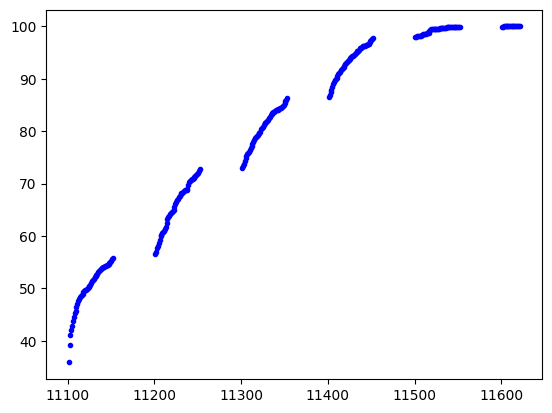

In [ ]:
# plot wm_yr_wk and percentage_item_store
df_percentage2 = df_percentage.toPandas()
plt.plot(df_percentage2['wm_yr_wk'], df_percentage2['percentage_item_store'], 'b.')

Chose surprenante en regardant le graphique, il y a certaines semaines où nous avons aucune information. Pour vérifier si il y a eu une erreur dans la manipulation des données, on prend la semaine avec wm_yr_wk à 11200 et compte le nombre de produits...

In [ ]:
sell_prices_df.filter(F.col("wm_yr_wk") == "11200").count()

0

0 produit pour la semaine 11200 car cette dernière n'existe pas, une année ayant environ 52/53 semaines, 2011 à 2012 est décrit avec des wm_yr_wk compris entre 11101 et 11152

In [ ]:
calendar_df.select("wm_yr_wk", "date").filter(F.col("wm_yr_wk") == "11101").show(10)

+--------+----------+
|wm_yr_wk|      date|
+--------+----------+
|   11101|2011-01-29|
|   11101|2011-01-30|
|   11101|2011-01-31|
|   11101|2011-02-01|
|   11101|2011-02-02|
|   11101|2011-02-03|
|   11101|2011-02-04|
+--------+----------+



In [ ]:
calendar_df.select("wm_yr_wk", "date").filter(F.col("wm_yr_wk") == "11152").show(10)

+--------+----------+
|wm_yr_wk|      date|
+--------+----------+
|   11152|2012-01-21|
|   11152|2012-01-22|
|   11152|2012-01-23|
|   11152|2012-01-24|
|   11152|2012-01-25|
|   11152|2012-01-26|
|   11152|2012-01-27|
+--------+----------+



La période 2012 - 2013 est accessible avec des wm_yr_wk compris entre 11201 et 11252 et ainsi de suite... Les produits sont donc ajoutés continuellement tout au long de la timeseries

Donc c'est possible que les time series ont été imputées au début dans la base de données walmart.

# Nombre de valeurs manquantes dans data_td2_df

In [ ]:
na_count = data_td2_df.filter(F.col("avg_sell_price").isNull()).count()
print(f"Nombre de valeurs NA dans avg_sell_price : {na_count}")

Nombre de valeurs NA dans avg_sell_price : 413401


In [ ]:
#filter avg_sell_price NA and sales =0
na_count_2 = data_td2_df.filter((F.col("avg_sell_price").isNull()) & (F.col("sales") == 0)).count()
print(f"Nombre de valeurs NA dans avg_sell_price et sales = 0 : {na_count_2}")

Nombre de valeurs NA dans avg_sell_price et sales = 0 : 413401


Il y a bien aucune vente réalisée lorsque absence de prix

In [ ]:
sales_null = data_td2_df.filter(F.col("sales") == 0).count()
print(f"Nombre de ventes nulles dans un mois : {sales_null}")

Nombre de ventes nulles dans un mois : 589041


Il y a donc bien certains mois où le produit est commercialisé mais n'est pas vendu ne serait-ce qu'une seule fois

In [ ]:
data_td2_count = data_td2_df.count()
print(f"Nombre de lignes dans data_td2_df : {data_td2_count}")

Nombre de lignes dans data_td2_df : 1951360


In [ ]:
print(f"Pourcentage de valeurs manquantes : {(na_count/data_td2_count)*100} %")

Pourcentage de valeurs manquantes : 21.18527591013447 %
